In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META', 
           'TSLA', 'JPM', 'WMT', 'BAC', 'NFLX', 'LNC']

# Download adjusted close price data for each ticker
data = pd.DataFrame()
for t in tickers:
    data[t] = yf.download(t, start='2016-1-1')['Adj Close']

/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
/Users/georgespyros/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[***

In [3]:
# Check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049 entries, 2016-01-04 to 2024-02-23
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2049 non-null   float64
 1   GOOGL   2049 non-null   float64
 2   MSFT    2049 non-null   float64
 3   AMZN    2049 non-null   float64
 4   META    2049 non-null   float64
 5   TSLA    2049 non-null   float64
 6   JPM     2049 non-null   float64
 7   WMT     2049 non-null   float64
 8   BAC     2049 non-null   float64
 9   NFLX    2049 non-null   float64
 10  LNC     2049 non-null   float64
dtypes: float64(11)
memory usage: 192.1 KB


In [4]:
data.head()

,AAPL,GOOGL,MSFT,AMZN,META,TSLA,JPM,WMT,BAC,NFLX,LNC
Date,,,,,,,,,,,
2016-01-04,23.946924,37.972000,48.608994,31.849501,102.111656,14.894000,50.781277,52.334915,13.845706,109.959999,37.272522
2016-01-05,23.346828,38.076500,48.830750,31.689501,102.621124,14.895333,50.869080,53.578148,13.845706,107.660004,37.302872
2016-01-06,22.889931,37.966499,47.943733,31.632500,102.860863,14.602667,50.134739,54.114609,13.550759,117.680000,35.617653
2016-01-07,21.923874,37.049999,46.276112,30.396999,97.816216,14.376667,48.107327,55.374863,13.061988,114.559998,34.617882
2016-01-08,22.039801,36.545502,46.418034,30.352501,97.226845,14.066667,47.029755,54.106091,12.809177,111.389999,33.763123


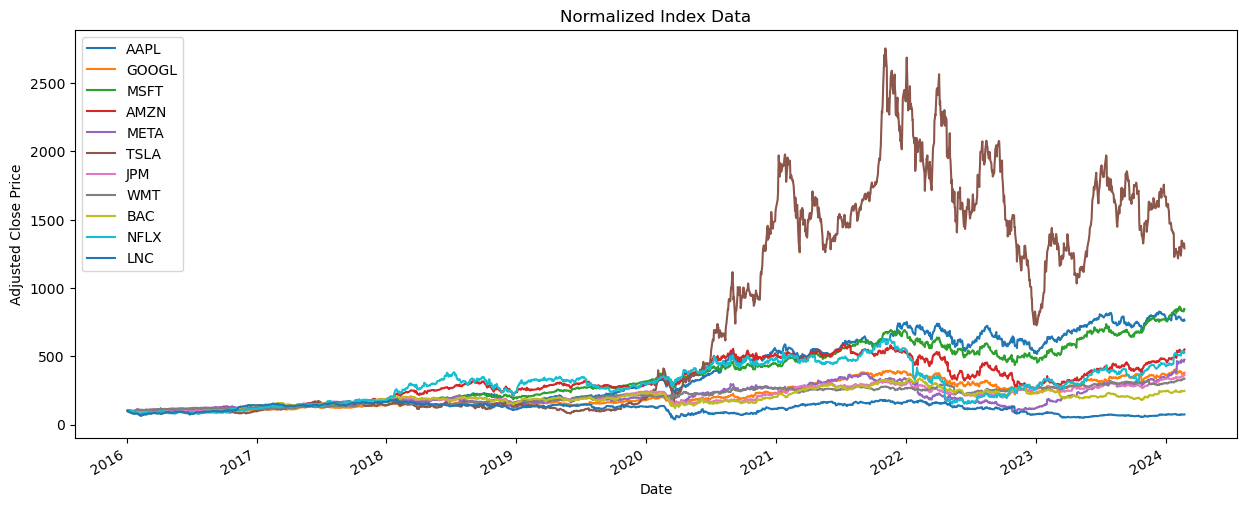

In [5]:
# Plot normalized index data
(data / data.iloc[0] * 100).plot(figsize=(15, 6))
plt.title('Normalized Index Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [6]:
# Calculate log returns
log_returns = np.log(data / data.shift(1))

# Calculate annualized log returns
annual_log_returns = log_returns.mean() * 252

In [7]:
# Define portfolio weights
# Equal weights for all tickers
weights = np.array([0.10] * len(tickers))

In [8]:
# Calculate portfolio return
portfolio_return = np.dot(annual_log_returns, weights)

In [9]:
# Calculate covariance matrix of log returns
cov_matrix = log_returns.cov()

In [10]:
# Calculate portfolio volatility
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

In [11]:
print("Portfolio Return:", round(portfolio_return * 100, 2), "%")
print("Portfolio Volatility:", round(portfolio_volatility * 100, 2), "%")

Portfolio Return: 19.77 %
Portfolio Volatility: 26.92 %
